<center><h1> <strong>Space X  Falcon 9 First Stage Landing Prediction</strong></h1>


<center><h2>Author: Muhammad Taimoor Khan</h2>

<h3><u><i>Exploratory Data Analysis (Along Visualization) with Pandas

#### Import Libraries & Define Auxiliary Functions


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "D:\Study Material\Data Science\IBM Data Science Course Work\Applied Data Science Capstone\data\dataset_part_2.csv"
df = pd.read_csv(path)
print("Dataset have been read successfully!")
df.head()

Dataset have been read successfully!


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\PMLS\AppData\Local\Temp\ipykernel_14916\1011105610.py:1: SyntaxWarning: invalid escape sequence '\S'
  path = "D:\Study Material\Data Science\IBM Data Science Course Work\Applied Data Science Capstone\data\dataset_part_2.csv"


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing_Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

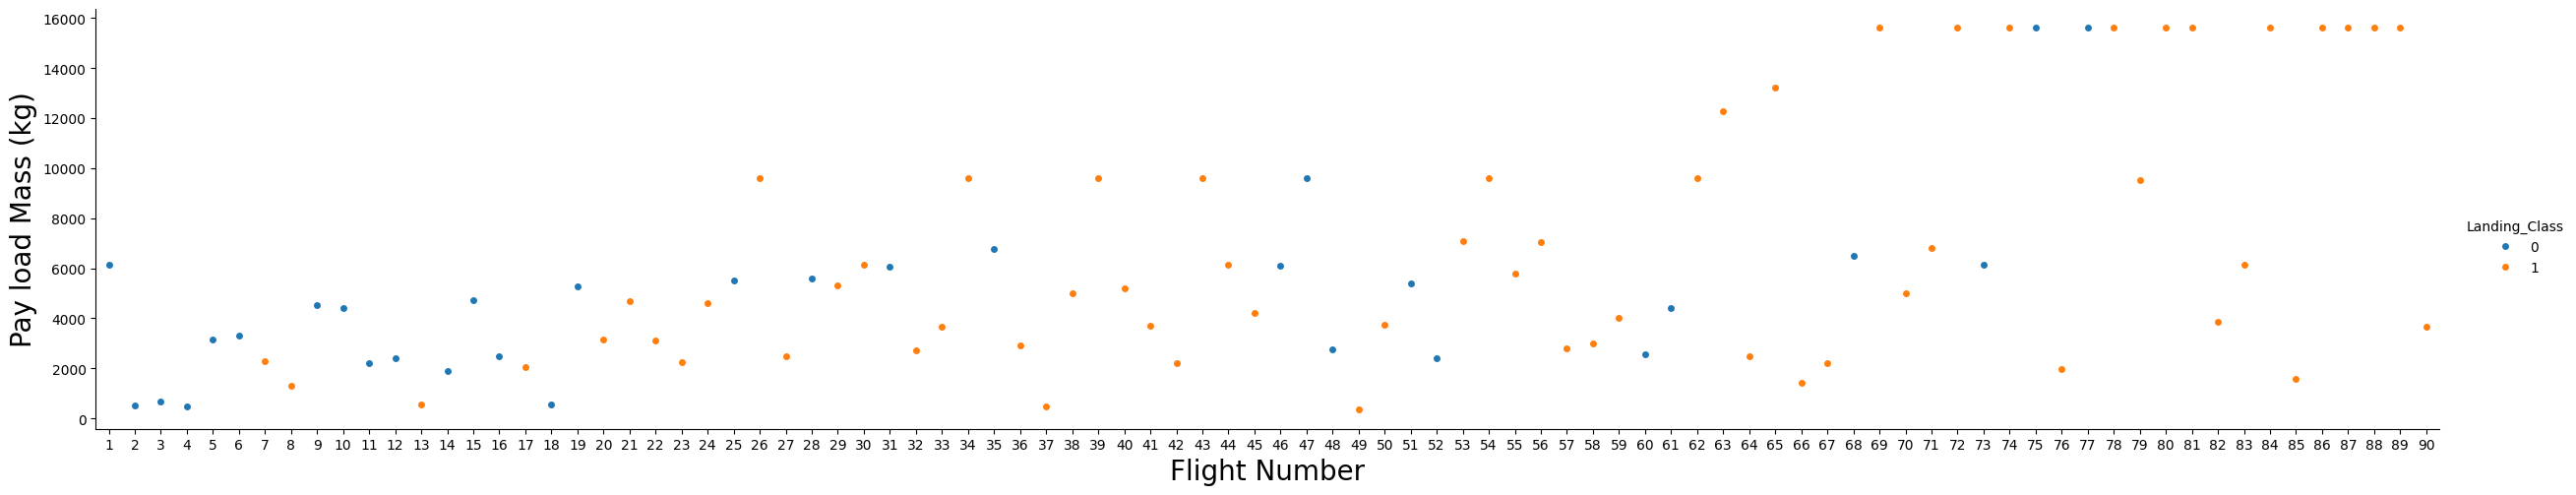

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Landing_Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

1. Visualize the relationship between Flight Number and Launch Site

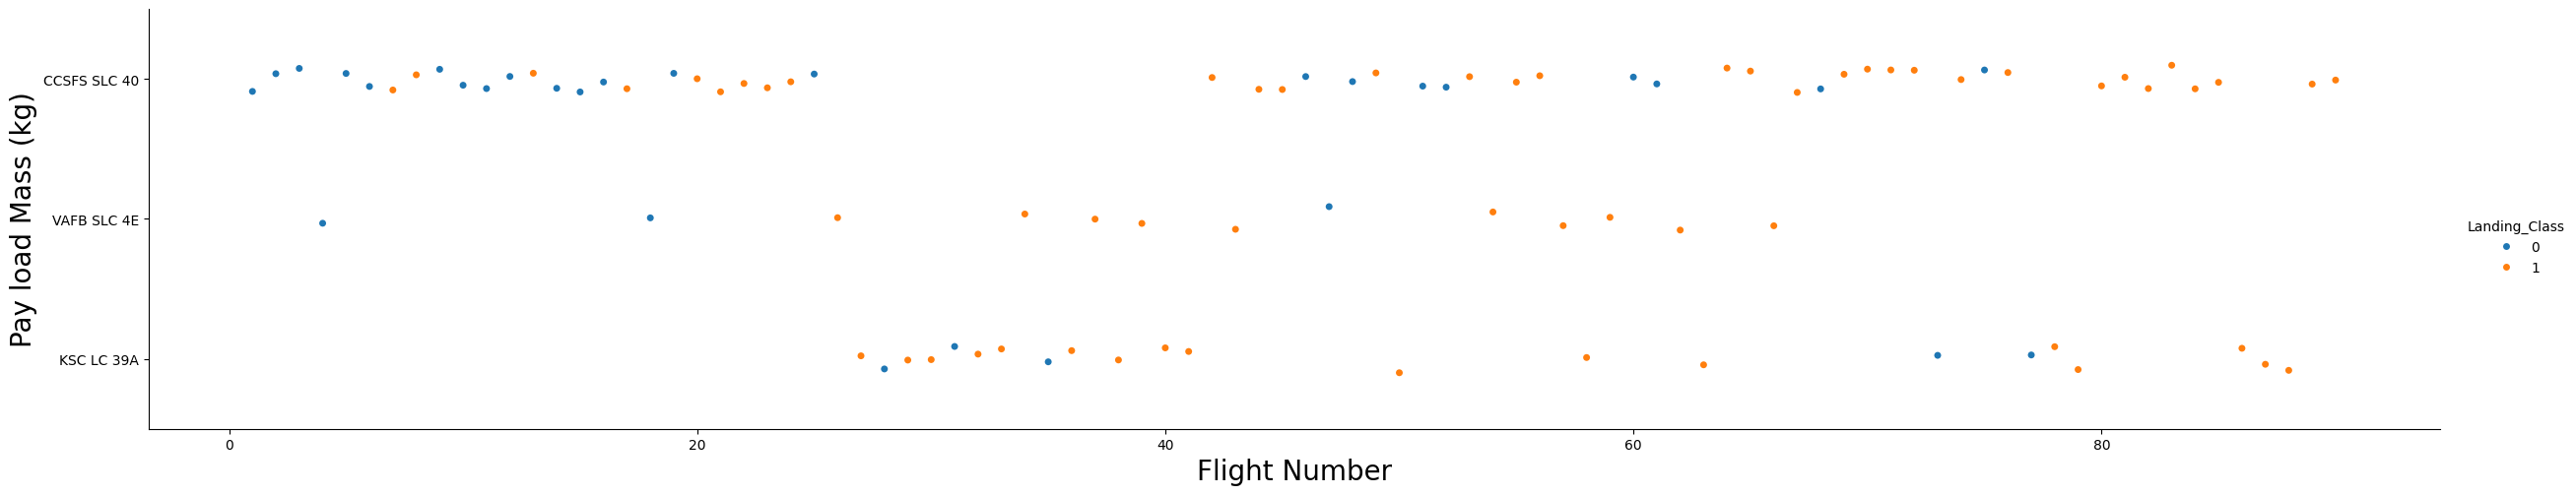

In [6]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Landing_Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

2. Visualize the relationship between Payload and Launch Site

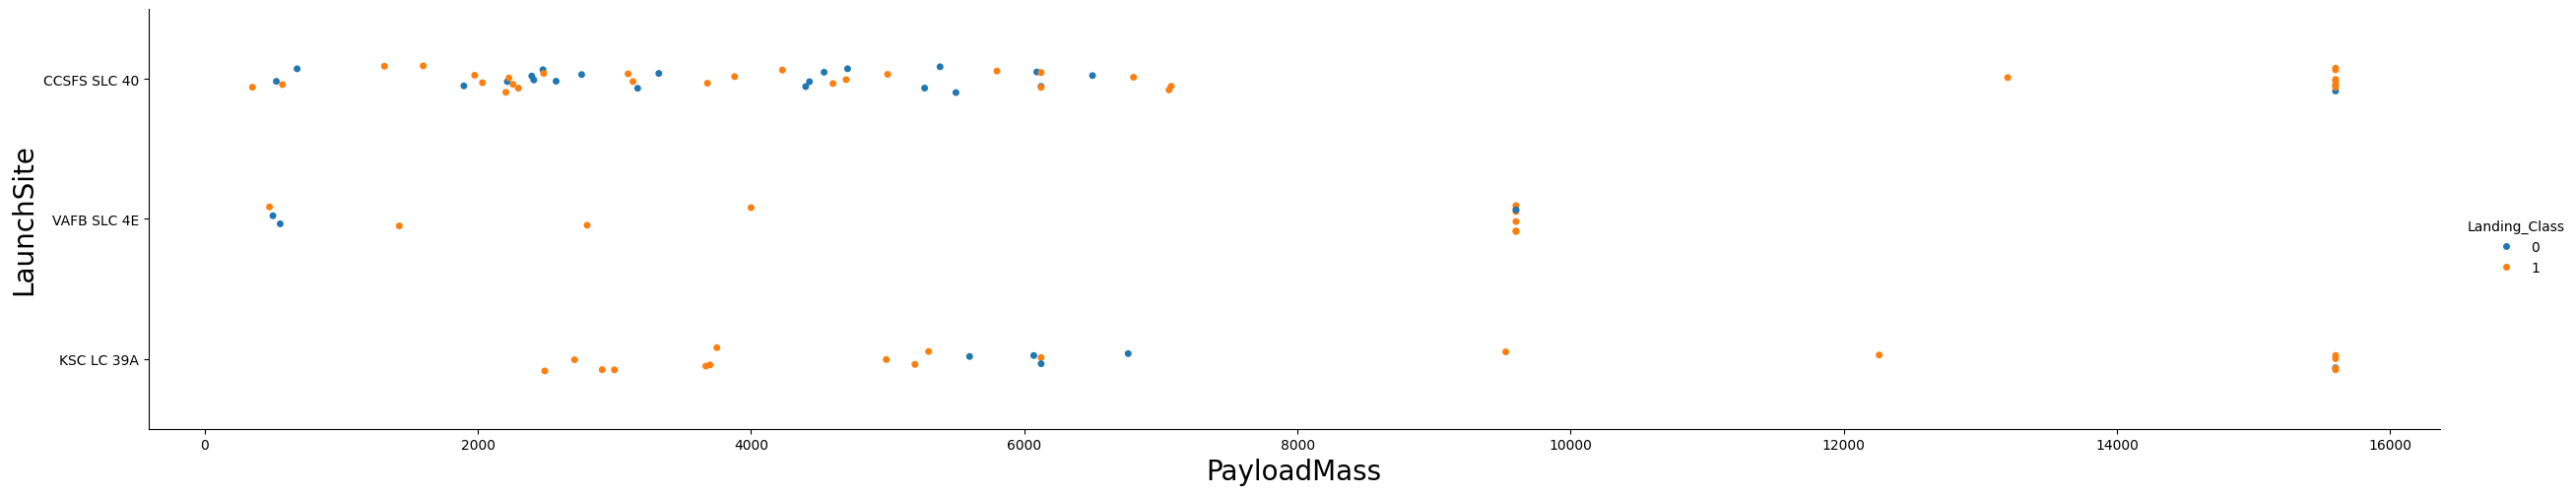

In [7]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Landing_Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

3. Visualize the relationship between success rate of each orbit type

<Axes: xlabel='Orbit'>

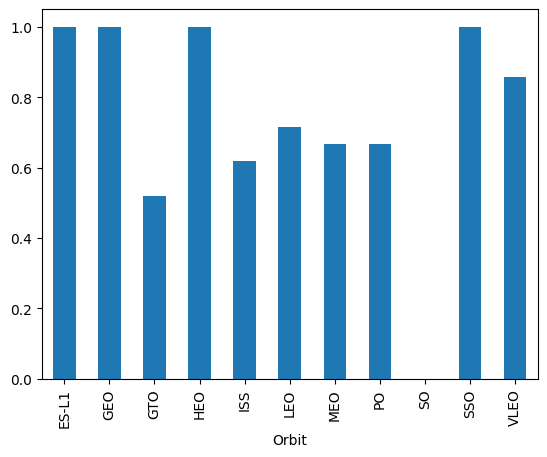

In [8]:
df.groupby('Orbit')['Landing_Class'].mean().plot.bar()

4. Visualize the relationship between FlightNumber and Orbit type

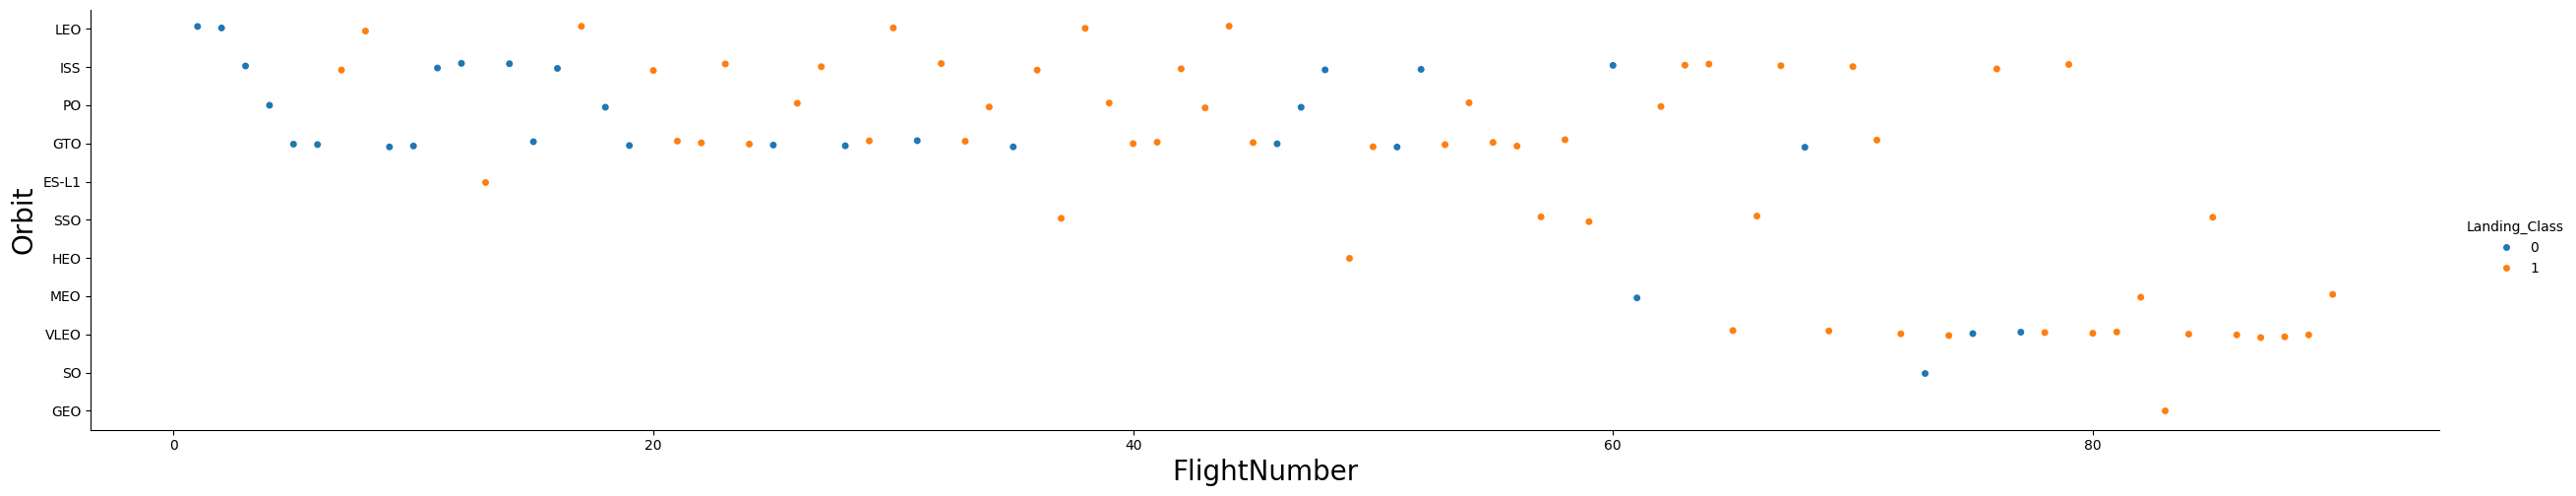

In [10]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Landing_Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

5. Visualize the relationship between Payload and Orbit type

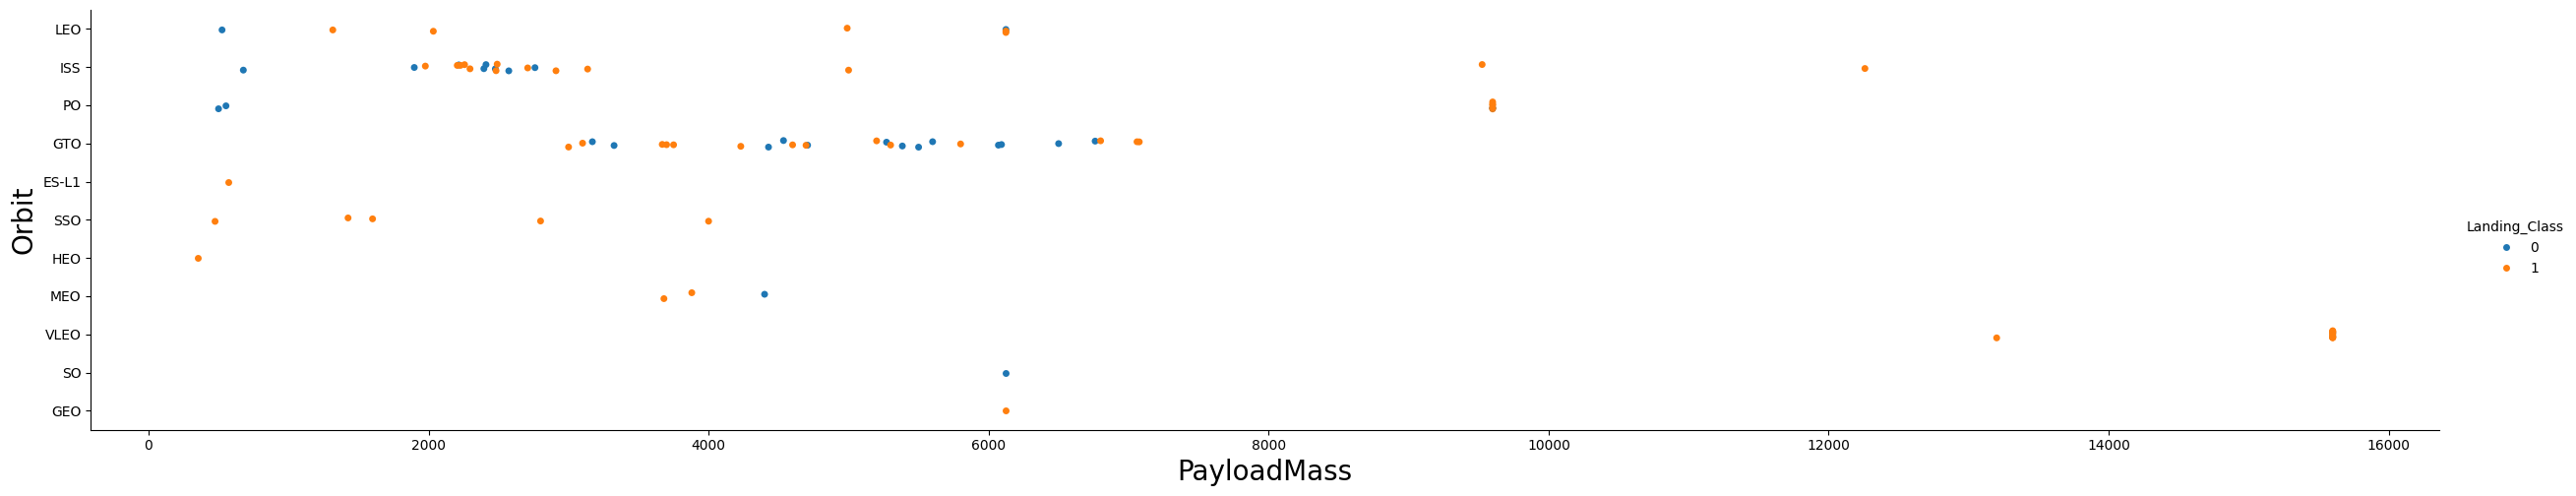

In [11]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Landing_Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

<code>You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.</code>

6. Visualize the launch success yearly trend

In [12]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year(df['Date'])

['2010',
 '2012',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020']

<Axes: xlabel='Year'>

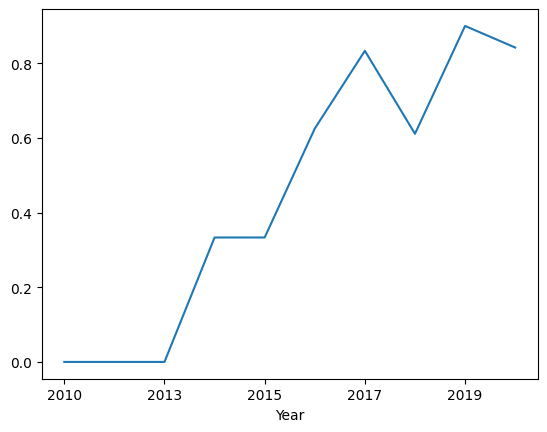

In [13]:
temp_df = df.copy()
temp_df['Year'] = year
temp_df.groupby('Year')['Landing_Class'].mean().plot()

<Code>you can observe that the sucess rate since 2013 kept increasing till 2020</code>

### Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [15]:
pd.get_dummies(df, columns=['Orbit', 'LaunchSite','LandingPad', 'Serial'], drop_first=True)

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6123.547647,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,True ASDS,2,True,True,True,5.0,...,False,False,False,False,False,False,False,False,True,False
86,87,2020-10-06,Falcon 9,15600.000000,True ASDS,3,True,True,True,5.0,...,False,False,False,False,False,False,True,False,False,False
87,88,2020-10-18,Falcon 9,15600.000000,True ASDS,6,True,True,True,5.0,...,False,False,False,True,False,False,False,False,False,False
88,89,2020-10-24,Falcon 9,15600.000000,True ASDS,3,True,True,True,5.0,...,False,False,False,False,False,False,False,False,True,False


7. Create dummy variables to categorical columns

In [16]:
features_one_hot = pd.get_dummies(df, columns=['Orbit', 'LaunchSite','LandingPad', 'Serial'], drop_first=False)
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6123.547647,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False


In [17]:
features_one_hot = features_one_hot.astype('float64', errors='ignore')

In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)